In [1]:
#import packages
import requests  
import re  
import pandas as pd  
#importing packages to support visualization
import matplotlib.pyplot as plt

#Seaborn is widely used for visualition
import seaborn as sns

import numpy as np   
from pandas import DataFrame
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#PCA in sklearn package allows dimensionality reduction functionality
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer



In [15]:
clust_cv = pd.read_csv("/Users/anitateladevalapalli/Documents/Text Mining/TM_project/clust_tfidf.csv", index_col=0) 
df_clust = pd.read_csv("/Users/anitateladevalapalli/Documents/Text Mining/TM_project/dense.csv", index_col=0) 

In [19]:
df_clust.reset_index(inplace=True)
df_clust = df_clust.rename(columns = {'index':'Label'})

In [20]:
df_clust.columns

Index(['Text', 'Label', 'transaction'], dtype='object')

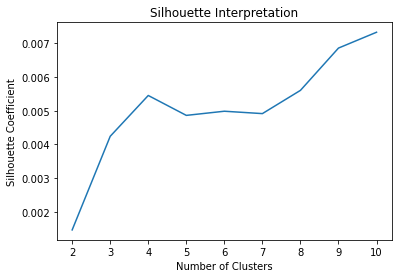

In [21]:
#plotting silhouette score to determine the best number of clusters
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(clust_cv)
    score = silhouette_score(clust_cv, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    
#plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Interpretation")
plt.show()

In [36]:
#running kmeans model on the tfidf dataframe
kmeans_cv = KMeans(n_clusters=4)
kmeans_cv.fit(clust_cv)
labels_cv = kmeans_cv.predict(clust_cv)


In [37]:
np.unique(labels_cv)

array([0, 1, 2, 3], dtype=int32)

In [38]:
#tfidf to create words frequency array
vect = TfidfVectorizer(stop_words='english', max_features=5000)
X = vect.fit_transform(df_clust['Text'].values.astype('U'))

In [39]:
#X = vectorizer.fit_transform(text_clust['Clean_Text'].values.astype('U'))

# initialize PCA with 3 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
df_clust['x0'] = x0
df_clust['x1'] = x1





In [40]:
# initialize kmeans with 3 centroids
#iterator=1
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    # fit the model
    kmeans.fit(X)
    col_name = 'cluster' + str(i)
    # store cluster labels in a variable
    clusters = kmeans.labels_
    df_clust.loc[:, col_name] = clusters 
    #iterator += 1 
    def get_top_keywords(n_terms):
        """This function returns the keywords for each centroid of the KMeans"""
        print("\n")
        print("When K = ",i)
        print("\n")
        print('CENTROIDS ARE', ['bold'])
      
        df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
        terms = vect.get_feature_names_out() # access tf-idf terms
        for k,r in df.iterrows():
            print('Cluster {}'.format(k))
            # for each row of the dataframe, find the n terms that have the highest tf idf score
            print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
    get_top_keywords(20)





When K =  2


CENTROIDS ARE ['bold']
Cluster 0
climate,good,want,atmospheric,thing,think,drought,need,storm,know,river,time,california,year,people,quake,like,earth,flood,volcano
Cluster 1
driven,focus,world,think,need,going,know,community,year,time,calamity,trump,relief,biden,people,like,moment,state,natural,disaster


When K =  3


CENTROIDS ARE ['bold']
Cluster 0
turkey,look,survival,flood,make,think,state,world,people,like,okami,donation,focus,driven,community,deflationary,token,calamity,disaster,natural
Cluster 1
erupted,year,cloud,look,island,erupting,throw,super,alaska,time,hawaii,erupts,lava,indonesia,omnicentrist,merapi,like,active,eruption,volcano
Cluster 2
country,going,good,storm,think,need,california,moment,quake,trump,know,time,state,biden,earth,year,like,people,flood,disaster


When K =  4


CENTROIDS ARE ['bold']
Cluster 0
climate,turkey,look,survival,make,think,state,world,people,like,okami,donation,focus,driven,community,deflationary,token,calamity,disaster,natural
C

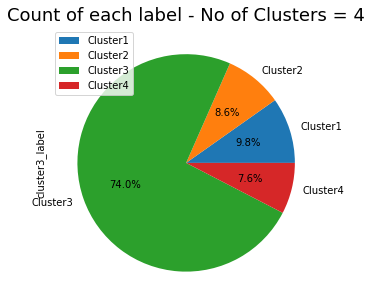

<Figure size 720x720 with 0 Axes>

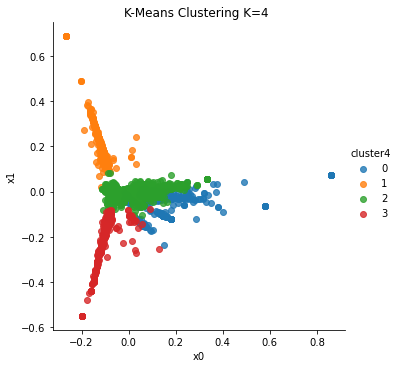

In [42]:
#Now we have three K means results.
# Lets map clusters to appropriate labels 
cluster_map = {0: "Cluster1", 1: "Cluster2", 2: "Cluster3", 3: "Cluster4" }
# apply mapping to cluster3 column
df_clust['cluster4_label'] = df_clust['cluster4'].map(cluster_map)

plt.title("Count of each label - No of Clusters = 4", fontdict={"fontsize": 18})
df_clust.groupby("cluster4_label")["cluster4"].count().plot.pie(figsize=(5,5),autopct='%1.1f%%',label='cluster3_label')
plt.legend()

clust_4 = df_clust[["Text", "cluster4"]]


plt.figure(figsize=(10, 10))
sns.lmplot(x='x0', y='x1', data=df_clust, hue='cluster4', fit_reg=False).set(title='K-Means Clustering K=4 ')
